In [1]:
import shutil
import os

In [9]:
def convert_filename(f):
    ff = f.split('_')
    chrom = ff[1]
    region_idx = int(ff[2])
    return f'sample_{region_idx}_5.0_8.0_120_{chrom}.pt'

dirs = [
    ('./GM/','/home/gridsan/gschuette/binz_group_shared/gkks/with_Zhuohan/conformations/GM/'),
    ('./IMR/','/home/gridsan/gschuette/binz_group_shared/gkks/with_Zhuohan/conformations/IMR/')
]
n=0
for start_dir,end_dir in dirs:

    files = [f for f in os.listdir(start_dir) if os.path.isfile(start_dir+f)]
    for f in files:
        new_fname = convert_filename(f)
        n+=1
        shutil.copyfile(start_dir + f,end_dir + new_fname)
        
    

In [10]:
import pandas as pd

In [11]:
a = pd.read_pickle('/home/gridsan/gschuette/refining_scHiC/revamp_with_zhuohan/data/embeddings_64_after_transformer/rosetta_stone.pkl')

In [12]:
a['1'].iloc[0][-1]

AttributeError: 'MultiIndex' object has no attribute 'iloc'

In [15]:
a['1'][0][-1]

780000

In [16]:
list(range(5,120,5))

[5,
 10,
 15,
 20,
 25,
 30,
 35,
 40,
 45,
 50,
 55,
 60,
 65,
 70,
 75,
 80,
 85,
 90,
 95,
 100,
 105,
 110,
 115]

In [21]:
(10 * 100 * 22 / 60) / 7

52.38095238095239

In [18]:
len(list(range(10,120,10)))

11

In [22]:
(10 * 100 / 60)

16.666666666666668

In [24]:
import torch
import sys
sys.path.insert(0,'/home/gridsan/gschuette/refining_scHiC/revamp_with_zhuohan/code/data_utils/SampleClass/')
from Distances import Distances, Normalizer

In [25]:
means_fp = '../../../mean_dists.pt'
mean_sq_fp = '../../../squares.pt'
normalizer = Normalizer(means_fp,mean_sq_fp)

In [26]:
distances = Distances(torch.load('/home/gridsan/gschuette/refining_scHiC/revamp_with_zhuohan/data/samples/origami_64_no_embed_reduction/'+\
                                 'eval_mode/unguided.pt')).unfold().unnormalize(normalizer)

(<Figure size 640x480 with 2 Axes>,
 <Axes: xlabel='Genomic index', ylabel='Genomic index'>,
 <matplotlib.colorbar.Colorbar at 0x7fc86903fa00>)

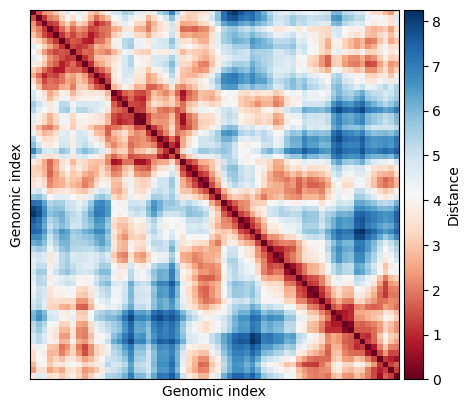

In [27]:
distances[0].plot()

(<Figure size 640x480 with 2 Axes>,
 <Axes: xlabel='Genomic index', ylabel='Genomic index'>,
 <matplotlib.colorbar.Colorbar at 0x7fc7e8777d30>)

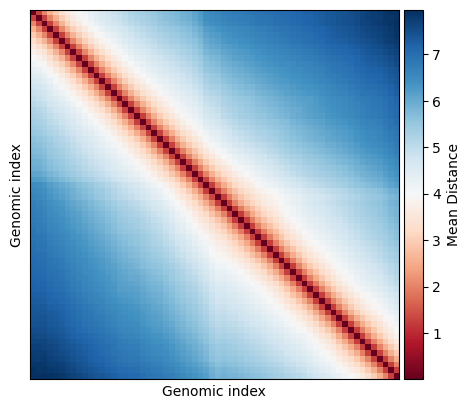

In [31]:
idx = torch.where(distances.values.isfinite().all(-1).all(-1))[0]
distances[idx].mean.plot()

In [32]:
dists2 = distances[~distances.values.isfinite().all(-1).all(-1)]

In [33]:
coords = dists2.coordinates

  0%|          | 0/10000 [00:00<?, ?it/s]

Change in loss (8.280064318362111e-07) is less than tolerance (1e-06).
Final error: 0.043140704848486866


(<Figure size 640x480 with 2 Axes>,
 <Axes: xlabel='Genomic index', ylabel='Genomic index'>,
 <matplotlib.colorbar.Colorbar at 0x7fc7e865c4f0>)

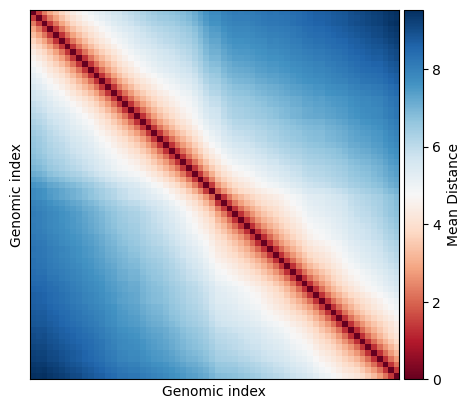

In [34]:
coords.distances.mean.plot()

In [35]:
coords.shape

torch.Size([1491, 64, 3])

In [36]:
coords.values.isfinite().all()

tensor(True)

In [37]:
distances.shape

torch.Size([100000, 64, 64])

In [38]:
d1 = Distances(torch.load('/home/gridsan/gschuette/refining_scHiC/revamp_with_zhuohan/data/samples/origami_64_no_embed_reduction/'+\
                                 'eval_mode/unguided.pt'))#.unfold().unnormalize(normalizer)

In [39]:
d1.shape

torch.Size([100000, 2, 32, 32])

In [40]:
emb = pd.read_pickle('/home/gridsan/gschuette/refining_scHiC/revamp_with_zhuohan/data/embeddings_64_after_transformer/chrom_22.tar.gz')